Dependencies

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "WineQT.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

Preprocessing as told in the task

In [3]:
df.drop(columns=["Id"], inplace=True)

In [4]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 5 else 0)
# using high quality and low quality as per the unique values

In [5]:
scaler = StandardScaler()
features = df.drop(columns=["quality"])  # Exclude target
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [6]:
df_scaled['quality'] = df['quality']

Splitting the data

In [7]:
X = df_scaled.drop(columns=["quality"])
y = df_scaled["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
dt_model = DecisionTreeClassifier(max_depth=7, min_samples_split=10,class_weight="balanced", random_state=10)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [9]:
# Decision Tree Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [10]:
print(f"\nDecision Tree Metrics:\n Accuracy: {accuracy_dt:.4f}\n Precision: {precision_dt:.4f}\n Recall: {recall_dt:.4f}\n F1-score: {f1_dt:.4f}")


Decision Tree Metrics:
 Accuracy: 0.9127
 Precision: 0.9628
 Recall: 0.9452
 F1-score: 0.9539


In [11]:
y_probs = dt_model.predict_proba(X_test)[:, 1]  # Probability of class 1

In [12]:
y_pred_adjusted = (y_probs > 0.6).astype(int)

In [13]:
accuracy_adj = accuracy_score(y_test, y_pred_adjusted)
precision_adj = precision_score(y_test, y_pred_adjusted)
recall_adj = recall_score(y_test, y_pred_adjusted)
f1_adj = f1_score(y_test, y_pred_adjusted)

print(f"\nAdjusted Decision Tree Metrics (Threshold 0.6):\n Accuracy: {accuracy_adj:.4f}\n Precision: {precision_adj:.4f}\n Recall: {recall_adj:.4f}\n F1-score: {f1_adj:.4f}")



Adjusted Decision Tree Metrics (Threshold 0.6):
 Accuracy: 0.9127
 Precision: 0.9628
 Recall: 0.9452
 F1-score: 0.9539


In [14]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=20,min_samples_leaf=10, class_weight="balanced", random_state=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50, random_state=10)

In [15]:
y_pred_rf = rf_model.predict(X_test)


In [16]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [17]:
print(f"\nRandom Forest Metrics:\n Accuracy: {accuracy_rf:.4f}\n Precision: {precision_rf:.4f}\n Recall: {recall_rf:.4f}\n F1-score: {f1_rf:.4f}")


Random Forest Metrics:
 Accuracy: 0.9345
 Precision: 0.9679
 Recall: 0.9635
 F1-score: 0.9657


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Cross-validation Accuracy: 0.9475


In [20]:
X_scaled = scaler.transform(df.drop(columns=['quality']))

In [21]:
kmeans = KMeans(n_clusters=3, random_state=10, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

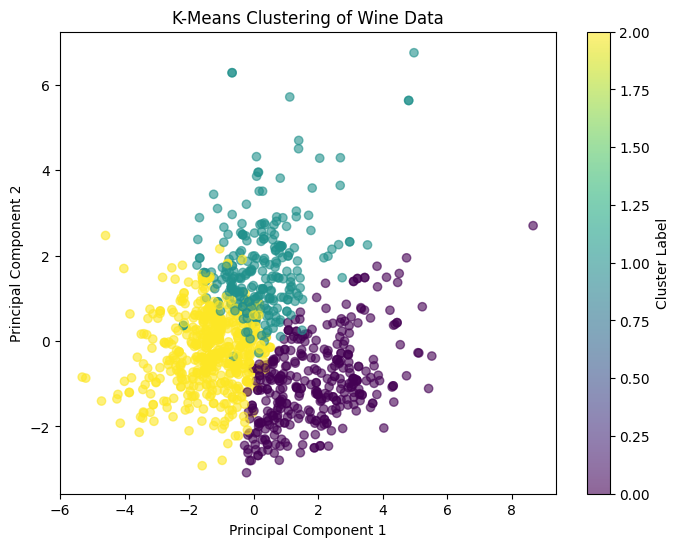

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of Wine Data")
plt.colorbar(label="Cluster Label")
plt.show()

In [25]:
import numpy as np
unique, counts = np.unique(df['cluster'], return_counts=True)
print("Cluster Distribution:", dict(zip(unique, counts)))

Cluster Distribution: {np.int32(0): np.int64(349), np.int32(1): np.int64(264), np.int32(2): np.int64(530)}
